In [2]:
import pytesseract
from PIL import Image
import pandas as pd
import json

In [4]:
# Perform OCR and get the result
ocr_data = pytesseract.image_to_data(Image.open('/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/other/invoice_100-page-1.jpg'))

# Convert the OCR data to a DataFrame
ocr_df = pd.DataFrame([line.split('\t') for line in ocr_data.split('\n')])

# Set column names
column_names = ocr_df.iloc[0]
ocr_df = ocr_df[1:]
ocr_df.columns = column_names

# Save the DataFrame to a CSV file
ocr_df.to_csv('/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/other/invoice_100-page-1_ocr.csv', index=False)


In [5]:
import pandas as pd
import xml.etree.ElementTree as ET

# Parse the XML file
tree = ET.parse('/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/other/invoice_100-page-1.xml')
root = tree.getroot()

# Initialize lists to store data
labels = []
xmin_list = []
ymin_list = []
xmax_list = []
ymax_list = []

# Extract data from XML
for obj in root.findall('object'):
    label = obj.find('name').text
    bbox = obj.find('bndbox')
    xmin = int(bbox.find('xmin').text)
    ymin = int(bbox.find('ymin').text)
    xmax = int(bbox.find('xmax').text)
    ymax = int(bbox.find('ymax').text)
    
    # Append data to lists
    labels.append(label)
    xmin_list.append(xmin)
    ymin_list.append(ymin)
    xmax_list.append(xmax)
    ymax_list.append(ymax)

# Create a DataFrame
data = {
    'Label': labels,
    'Xmin': xmin_list,
    'Ymin': ymin_list,
    'Xmax': xmax_list,
    'Ymax': ymax_list
}
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/other/invoice_100-page-1.csv', index=False)


In [6]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/other/invoice_100-page-1_ocr.csv')

# Calculate xmin, ymin, xmax, ymax
df['xmin'] = df['left']
df['ymin'] = df['top']
df['xmax'] = df['left'] + df['width']
df['ymax'] = df['top'] + df['height']

# Overwrite the existing CSV file with the updated DataFrame
df.to_csv('/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/other/invoice_100-page-1_ocr.csv', index=False)


In [7]:
import pandas as pd
from PIL import Image
import pytesseract

# Read the CSV file
df = pd.read_csv('/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/other/invoice_100-page-1.csv')

# Initialize a list to store the form data
form_data = []

# Open the image (replace 'image_path.jpg' with the path to your image)
image_path = '/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/other/invoice_100-page-1.jpg'
image = Image.open(image_path)

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Extract label and bounding box coordinates
    label = row['Label']
    xmin, ymin, xmax, ymax = row['Xmin'], row['Ymin'], row['Xmax'], row['Ymax']
    
    # Crop the image to get the text within the bounding box
    cropped_image = image.crop((xmin, ymin, xmax, ymax))
    
    # Perform OCR to extract text from the cropped image
    text = pytesseract.image_to_string(cropped_image)
    
    # Create a dictionary for the form data
    form_item = {
        "text": text.strip(),
        "box": [xmin, ymin, xmax, ymax],
        "label": label,
        "words": [],  # We'll populate this later
        "linking": [],  # We'll populate this later
        "id": index
    }
    
    # Append the form item to the form data list
    form_data.append(form_item)

# Create the final JSON structure
json_data = {"form": form_data}

# Now you can proceed with further processing of the JSON data
# such as adding word-level information inside the 'words' list
# and linking information inside the 'linking' list.

# Print or save the JSON data
print(json_data)

# Save the JSON data to a file
with open('/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/other/invoice_100-page-1.json', 'w') as json_file:
    json.dump(json_data, json_file)

print("JSON file saved successfully.")


{'form': [{'text': '95611677', 'box': [494, 100, 792, 159], 'label': 'invoice_number', 'words': [], 'linking': [], 'id': 0}, {'text': '07/19/2016', 'box': [1144, 194, 1417, 255], 'label': 'invoice_date', 'words': [], 'linking': [], 'id': 1}, {'text': 'Johnson Group', 'box': [1186, 730, 1502, 778], 'label': 'client_name', 'words': [], 'linking': [], 'id': 2}, {'text': '0693 Robin Mountain Apt. 180\nLake Christina, MI 87634', 'box': [1183, 782, 1837, 891], 'label': 'client_address', 'words': [], 'linking': [], 'id': 3}, {'text': '952-81-0165', 'box': [1345, 932, 1612, 980], 'label': 'client_tax_id', 'words': [], 'linking': [], 'id': 4}, {'text': 'Franco Group', 'box': [193, 725, 483, 778], 'label': 'seller_name', 'words': [], 'linking': [], 'id': 5}, {'text': '796 Arnold Cove Apt. 091\nReginaport, AZ 06940', 'box': [189, 782, 739, 886], 'label': 'seller_address', 'words': [], 'linking': [], 'id': 6}, {'text': '', 'box': [345, 933, 616, 977], 'label': 'seller_tax_id', 'words': [], 'linkin

In [9]:
import json

# Load the JSON data
with open('/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/other/invoice_100-page-1.json', 'r') as json_file:
    data = json.load(json_file)

# Function to check if coordinates are within parent box
def is_within_parent_box(parent_box, box):
    xmin_parent, ymin_parent, xmax_parent, ymax_parent = parent_box
    xmin, ymin, xmax, ymax = box
    return xmin >= xmin_parent and ymin >= ymin_parent and xmax <= xmax_parent and ymax <= ymax_parent

# Iterate through each item in the form data
for item in data['form']:
    # Extract parent bounding box coordinates
    parent_box = item['box']
    
    # Initialize a list to store words
    words = []
    
    # Iterate through each word in the JSON data
    for word_item in data['form']:
        # Extract word bounding box coordinates
        word_box = word_item['box']
        
        # Check if word box is within parent box
        if is_within_parent_box(parent_box, word_box):
            # Append word text and box to words list
            words.append({"text": word_item["text"], "box": word_box})
    
    # Update the words list in the item
    item['words'] = words

# Save the modified JSON data to a new file
with open('/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/other/temp_invoice_100-page-1.json', 'w') as json_output:
    json.dump(data, json_output, indent=4)

print("Modified JSON file saved successfully.")


Modified JSON file saved successfully.


In [36]:
import json
import csv

# Load the JSON data
with open('/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/invoice_100-page-1_json.json', 'r') as json_file:
    data = json.load(json_file)

# Load CSV data and create words list
with open('/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/ocr_result.csv', 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        word_text = row['text']
        try:
            word_box = (float(row['xmin']), float(row['ymin']), float(row['xmax']), float(row['ymax']))
        except ValueError:
            print(word_text)
            # Skip this word if any of the coordinates are empty
            continue
        
        # Iterate through parent items in the JSON data
        for parent_item in data['form']:
            parent_box = parent_item['box']
            
            # Check if word box is within parent box
            if word_text and is_within_parent_box(parent_box, word_box):
                # Append word text and box to the words list of the corresponding parent
                parent_item['words'].append({"text": word_text, "box": word_box})

# Save the modified JSON data to a new file
with open('/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/invoice_100-page-1_json.json', 'w') as json_output:
    json.dump(data, json_output, indent=4)

print("Modified JSON file saved successfully.")



Modified JSON file saved successfully.


In [37]:
import json

with open('/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/invoice_100-page-1_json.json') as f:
  data = json.load(f)

for annotation in data['form']:
  print(annotation)

{'text': '95611677', 'box': [494, 100, 792, 159], 'label': 'invoice_number', 'words': [{'text': '95611677', 'box': [508.0, 111.0, 769.0, 148.0]}], 'linking': [], 'id': 0}
{'text': '07/19/2016', 'box': [1144, 194, 1417, 255], 'label': 'invoice_date', 'words': [{'text': '07/19/2016', 'box': [1159.0, 209.0, 1408.0, 246.0]}], 'linking': [], 'id': 1}
{'text': 'Johnson Group', 'box': [1186, 730, 1502, 778], 'label': 'client_name', 'words': [{'text': 'Johnson', 'box': [1200.0, 735.0, 1356.0, 774.0]}, {'text': 'Group', 'box': [1374.0, 736.0, 1493.0, 774.0]}], 'linking': [], 'id': 2}
{'text': '0693 Robin Mountain Apt. 180\nLake Christina, MI 87634', 'box': [1183, 782, 1837, 891], 'label': 'client_address', 'words': [{'text': '0693', 'box': [1205.0, 787.0, 1301.0, 818.0]}, {'text': 'Robin', 'box': [1320.0, 786.0, 1427.0, 818.0]}, {'text': 'Mountain', 'box': [1447.0, 786.0, 1626.0, 818.0]}, {'text': 'Apt.', 'box': [1643.0, 787.0, 1719.0, 825.0]}, {'text': '180', 'box': [1740.0, 787.0, 1810.0, 818

In [38]:
from PIL import Image, ImageDraw, ImageFont

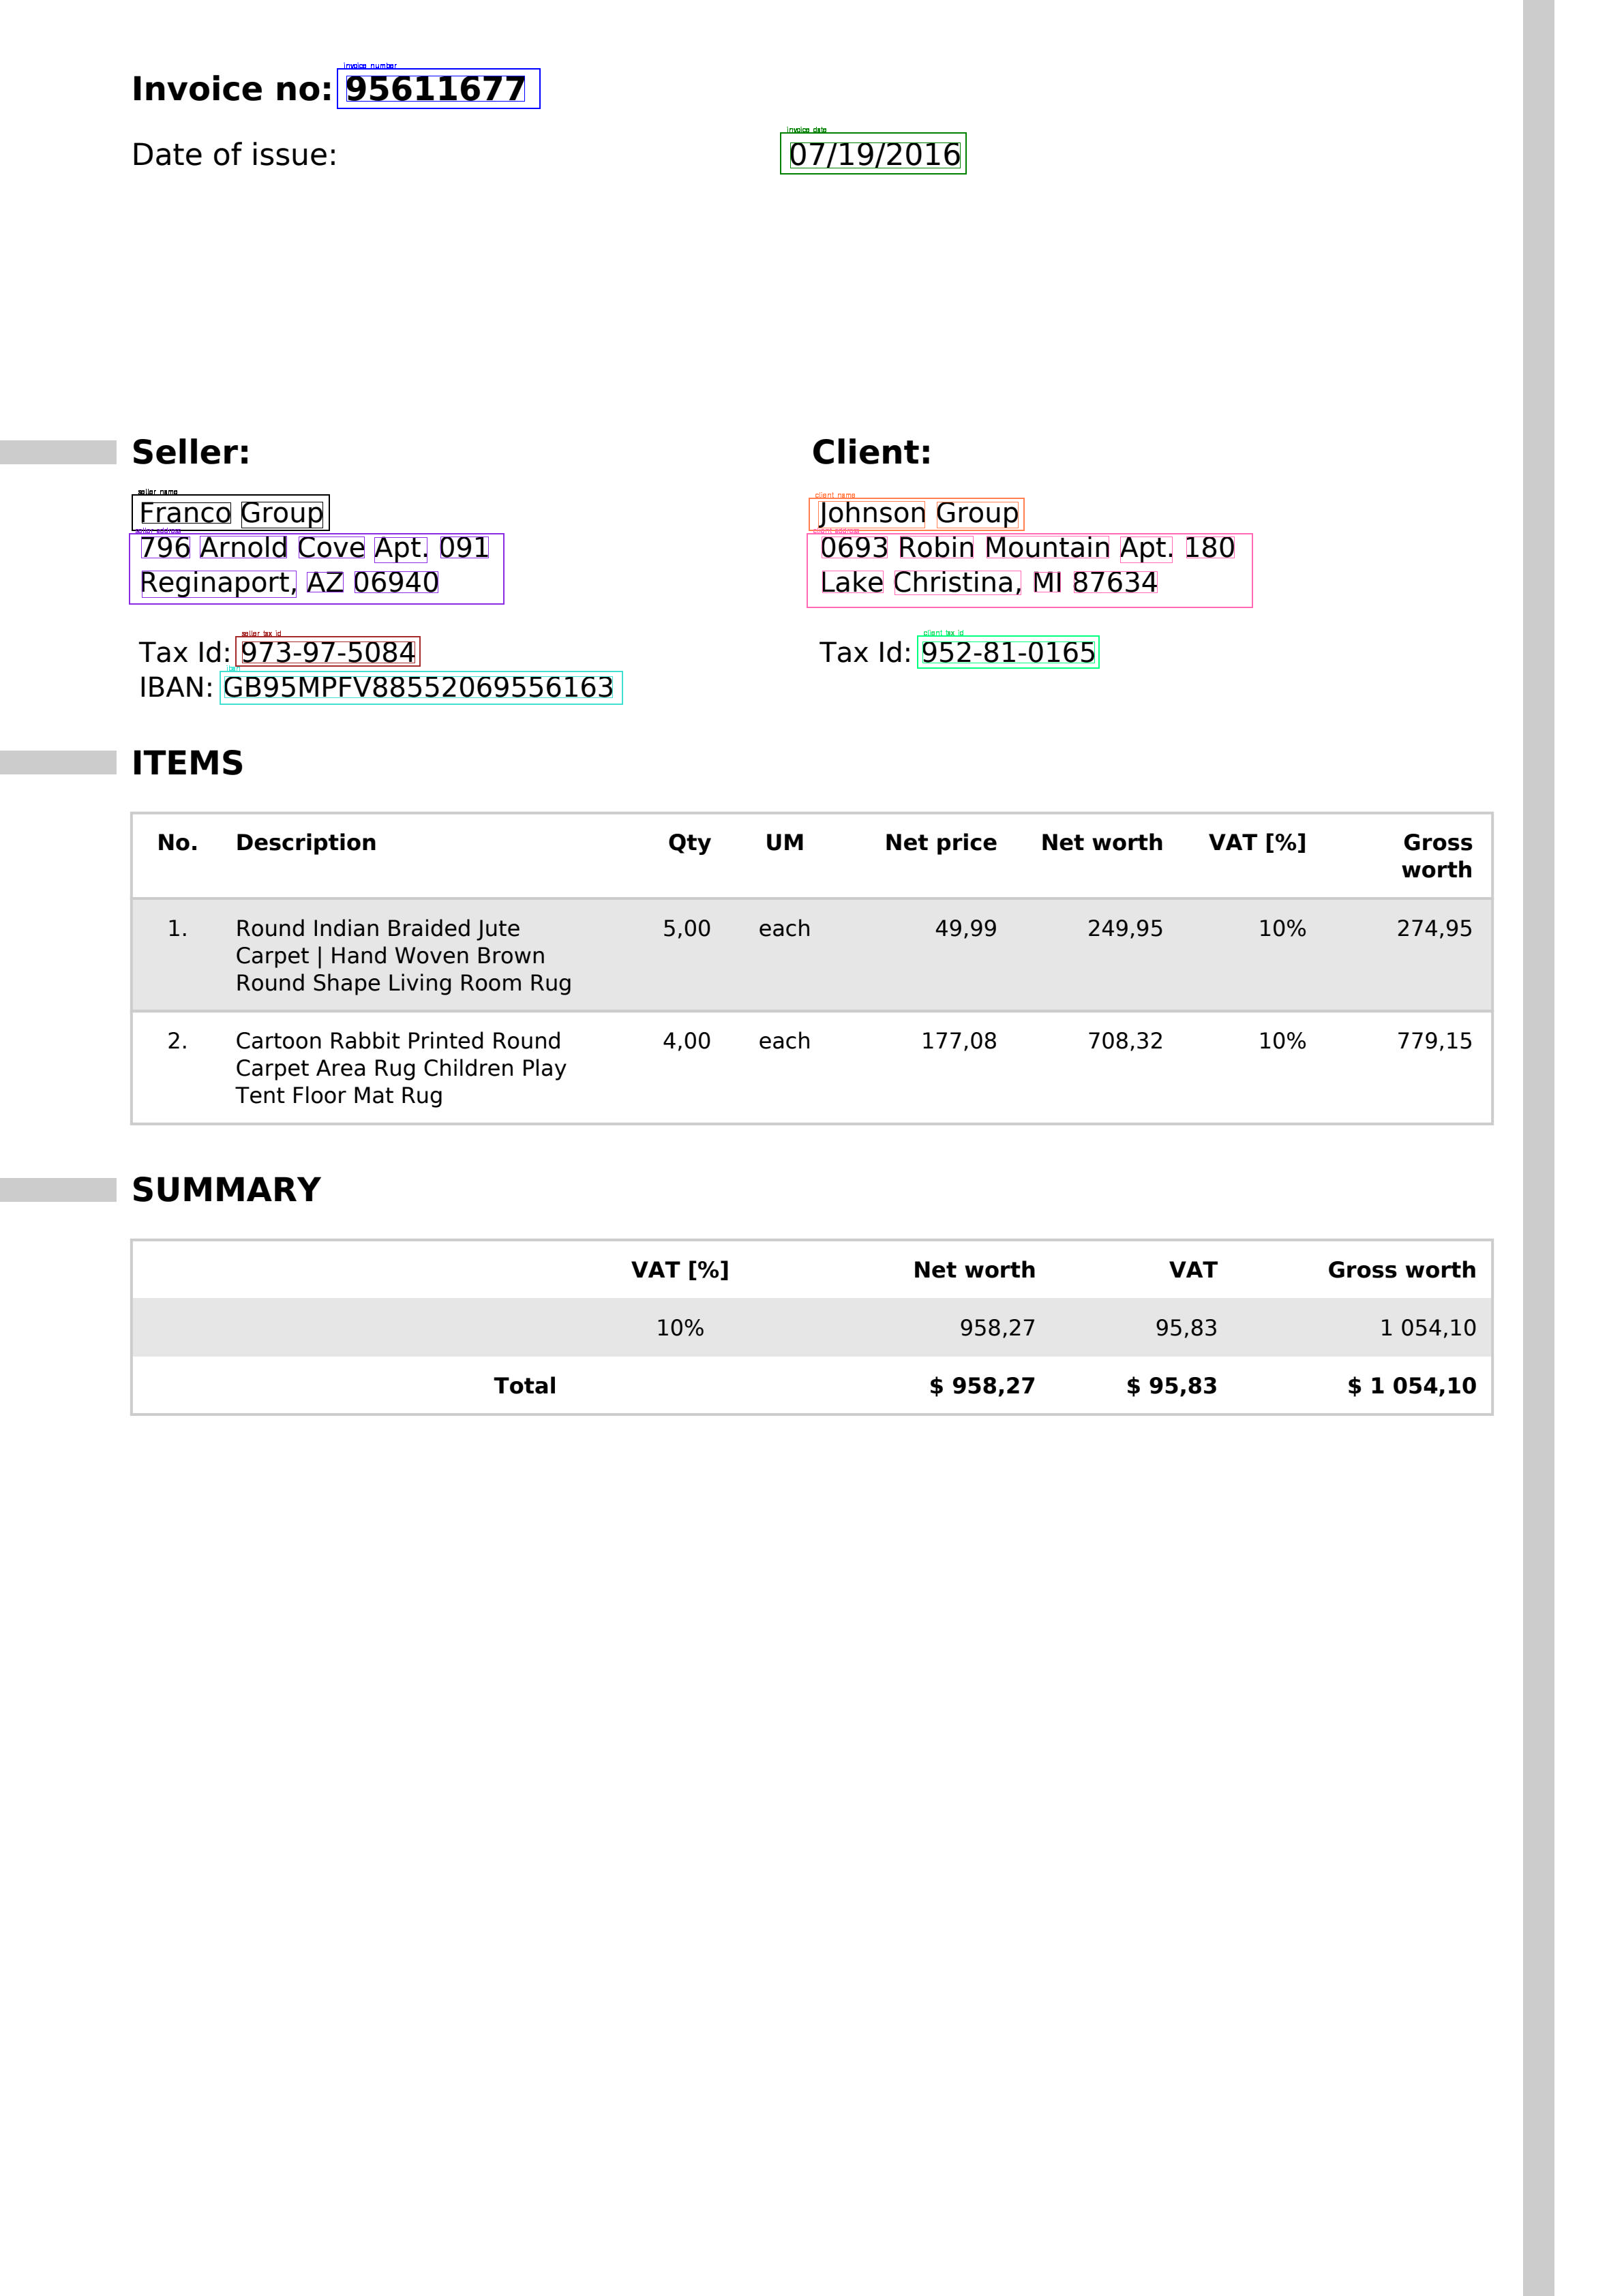

In [39]:
draw = ImageDraw.Draw(image, "RGBA")

font = ImageFont.load_default()

label2color = {'invoice_number':'blue', 'invoice_date':'green', 'client_name':'coral', 'client_address':'hotpink', 'client_tax_id': 'springgreen', 'seller_name': 'black', 'seller_address': 'blueviolet', 'seller_tax_id': 'brown', 'iban': 'turquoise'}

for annotation in data['form']:
  label = annotation['label']
  general_box = annotation['box']
  draw.rectangle(general_box, outline=label2color[label], width=2)
  draw.text((general_box[0] + 10, general_box[1] - 10), label, fill=label2color[label], font=font)
  words = annotation['words']
  for word in words:
    box = word['box']
    draw.rectangle(box, outline=label2color[label], width=1)

image

In [8]:
import json
import csv
def is_within_parent_box(parent_box, box):
    xmin_parent, ymin_parent, xmax_parent, ymax_parent = parent_box
    xmin, ymin, xmax, ymax = box
    return xmin >= xmin_parent and ymin >= ymin_parent and xmax <= xmax_parent and ymax <= ymax_parent

# def is_within_parent_box(parent_box, word_box):
#     # Check if word box is within parent box
#     return (parent_box[0] <= word_box[0] <= parent_box[2] and
#             parent_box[1] <= word_box[1] <= parent_box[3] and
#             parent_box[0] <= word_box[2] <= parent_box[2] and
#             parent_box[1] <= word_box[3] <= parent_box[3])

# Load the JSON data
with open('/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/other/invoice_100-page-1.json', 'r') as json_file:
    data = json.load(json_file)

# Load CSV data and create words list
with open('/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/other/invoice_100-page-1_ocr.csv', 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        word_text = row['text']
        try:
            word_box = (float(row['xmin']), float(row['ymin']), float(row['xmax']), float(row['ymax']))
        except ValueError:
            print(word_text)
            # Skip this word if any of the coordinates are empty
            continue
        
        # Check if word box is within any parent box
        word_within_parent = False
        for parent_item in data['form']:
            parent_box = parent_item['box']
            if is_within_parent_box(parent_box, word_box):
                # Append word text and box to the words list of the corresponding parent
                parent_item['words'].append({"text": word_text, "box": word_box})
                word_within_parent = True
                break
        
        # If word is not within any parent box, add it as a new entry
        if not word_within_parent:
            last_id = data['form'][-1]['id'] if data['form'] else 0
            new_entry = {
                "id": last_id + 1,
                "box": word_box,
                "label": "other",
                "words": [{"text": word_text, "box": word_box}]
            }
            data['form'].append(new_entry)

# Save the modified JSON data to a new file
with open('/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/other/temp_invoice_100-page-1.json', 'w') as json_output:
    json.dump(data, json_output, indent=4)

print("Modified JSON file saved successfully.")



Modified JSON file saved successfully.


In [14]:
import json
import csv


# Load the JSON data
with open('/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/other/invoice_100-page-1.json', 'r') as json_file:
    data = json.load(json_file)

# Load CSV data and create words list
with open('/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/other/invoice_100-page-1_ocr.csv', 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    new_entry_id = 0
    for row in csv_reader:
        word_text = row['text']
        try:
            word_box = (float(row['xmin']), float(row['ymin']), float(row['xmax']), float(row['ymax']))
        except ValueError:
            print(word_text)
            # Skip this word if any of the coordinates are empty
            continue
        
        # Check if word box is within any parent box
        word_within_parent = False
        for parent_item in data['form']:
            parent_box = parent_item['box']
            if word_text and is_within_parent_box(parent_box, word_box):
                # Append word text and box to the words list of the corresponding parent
                parent_item['words'].append({"text": word_text, "box": word_box})
                word_within_parent = True
                break
            
        # # If word is not within any parent box, add it as a new entry
        if not word_within_parent:
            new_entry_id += 1
            new_entry = {
                "id": new_entry_id,
                "box": word_box,
                "label": "other",
                "words": [{"text": word_text, "box": word_box}]
            }
            data['form'].append(new_entry)

# Save the modified JSON data to a new file
with open('/home/madhaviaghera/Documents/SelfLearning/LayoutLM/json_prepare/other/temp_invoice_100-page-1.json', 'w') as json_output:
    json.dump(data, json_output, indent=4)

print("Modified JSON file saved successfully.")



Modified JSON file saved successfully.
